<a href="https://colab.research.google.com/github/manish55shukla/AirBnb-Bookings-Analysis/blob/main/Project_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#             **AirBnb Bookings Analysis EDA Project**

---



Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.


In [1]:
#Importing all the libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
%matplotlib inline 

#It enables inline plotting i.e, the plot/graph will be displayed below the cell where the plotting commands are written. 

In [3]:
# Mount the google drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('Airbnb NYC 2019.csv')

In [5]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22059 entries, 0 to 22058
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22059 non-null  int64  
 1   name                            22044 non-null  object 
 2   host_id                         22059 non-null  int64  
 3   host_name                       22045 non-null  object 
 4   neighbourhood_group             22059 non-null  object 
 5   neighbourhood                   22059 non-null  object 
 6   latitude                        22059 non-null  float64
 7   longitude                       22059 non-null  float64
 8   room_type                       22058 non-null  object 
 9   price                           22058 non-null  float64
 10  minimum_nights                  22058 non-null  float64
 11  number_of_reviews               22058 non-null  float64
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.205900e+04,2.205900e+04,22059.000000,22059.000000,22058.000000,22058.000000,22058.000000,18358.000000,22058.000000,22058.000000
mean,8.511062e+06,2.447159e+07,40.729520,-73.956852,151.245852,7.408151,35.785248,0.944976,3.721688,103.508614
std,5.258526e+06,2.707545e+07,0.053118,0.039701,235.534537,23.883845,58.826793,1.297014,12.938362,132.634612
min,2.539000e+03,2.571000e+03,40.499790,-74.242850,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,3.996390e+06,3.977023e+06,40.689765,-73.983265,73.000000,2.000000,1.000000,0.100000,1.000000,0.000000
50%,8.520836e+06,1.428111e+07,40.723370,-73.958010,110.000000,3.000000,9.000000,0.360000,1.000000,9.000000
75%,1.324998e+07,3.657868e+07,40.763950,-73.941490,175.000000,5.000000,45.000000,1.310000,2.000000,221.000000
max,1.775024e+07,1.210969e+08,40.908040,-73.000000,10000.000000,1250.000000,629.000000,16.220000,121.000000,365.000000


In [7]:
# Find first 3 rows of the DataFrame

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0


In [8]:
# Find last 3 rows of the DataFrame

df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22056,17748284,Guest BedRm in quaint NYC neighborhood. NEAR T...,25196982,Nikolas,Queens,Astoria,40.76924,-73.91702,Private room,65.0,1.0,11.0,2019-06-17,3.24,1.0,9.0
22057,17749273,1 br Woodside - close to LGA!,121096858,Caressa,Queens,Woodside,40.74176,-73.90631,Private room,35.0,1.0,0.0,NaN,NaN,1.0,0.0
22058,17750238,Great room in a spacious Inwood Apartment,13860679,Max,Manhattan,Inwood,40.86348,-73.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Calculate which fields are null in the DataFrame
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22054,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22055,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22056,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22057,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [10]:
# Sum of all the null fields

df.isnull().sum()

id                                   0
name                                15
host_id                              0
host_name                           14
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       3701
reviews_per_month                 3701
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [11]:
# Print the first 10 name, price and corresponding room type of DataFrame

df.loc[0:9, ["name","price",'room_type']]


,name,price,room_type
0,Clean & quiet apt home by the park,149.0,Private room
1,Skylit Midtown Castle,225.0,Entire home/apt
2,THE VILLAGE OF HARLEM....NEW YORK !,150.0,Private room
3,Cozy Entire Floor of Brownstone,89.0,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,80.0,Entire home/apt
5,Large Cozy 1 BR Apartment In Midtown East,200.0,Entire home/apt
6,BlissArtsSpace!,60.0,Private room
7,Large Furnished Room Near B'way,79.0,Private room
8,Cozy Clean Guest Room - Family Apt,79.0,Private room
9,Cute & Cozy Lower East Side 1 bdrm,150.0,Entire home/apt


In [12]:
# df.groupby(["room_type"])

df.nunique()

id                                22059
name                              21769
host_id                           18461
host_name                          6475
neighbourhood_group                   5
neighbourhood                       205
latitude                          12936
longitude                          9806
room_type                             3
price                               479
minimum_nights                       87
number_of_reviews                   390
last_review                        1745
reviews_per_month                   673
calculated_host_listings_count       35
availability_365                    366
dtype: int64

In [13]:
# Print first 10 persons of private room having host_id, host_name, neighbourhood having maximum number_of_reviews.

private_rooms = df[df['room_type'] == 'Private room']
list_private_rooms = private_rooms.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name = "number_of_reviews").sort_values(by= ['number_of_reviews'],ascending =False)

list_private_rooms.head(10)

,host_id,host_name,neighbourhood,number_of_reviews
2421,6885157,Randy,Bedford-Stuyvesant,13
7772,96098402,Wynpoints,Midtown,12
7181,65809485,Shirley,Flushing,12
7288,69545883,Chayla,Midtown,12
311,344035,Brooklyn& Breakfast -Len-,Prospect Heights,12
3931,16677326,Alex And Zeena,Chelsea,11
345,417504,The Box House Hotel,Greenpoint,11
5058,26377263,Stat,Bushwick,10
5700,35524316,Yasu & Akiko,Hell's Kitchen,10
4056,17638424,Sophie,Elmhurst,8


In [14]:
# FInd out how many unique neighbourhood Erin have

erin_data = df[df['host_name'] == 'Erin']

erin_neighbourhood = erin_data[['host_id','host_name','neighbourhood']]

erin_neighbourhood.head(10)

,host_id,host_name,neighbourhood
888,1644452,Erin,Gramercy
1004,1952186,Erin,Williamsburg
1185,2487319,Erin,Upper West Side
1303,2790324,Erin,Bedford-Stuyvesant
2334,712590,Erin,Prospect Heights
2389,4922378,Erin,Midtown
2577,1673136,Erin,Chelsea
2831,8457613,Erin,Gramercy
3405,10478532,Erin,Hell's Kitchen
4285,3864482,Erin,Greenwich Village


In [15]:
#Find number of room types and mean of the price along with minimum nights
count_room_type = df.groupby('room_type').agg({'room_type':'count','price':'mean','minimum_nights':'min'})

In [16]:
# Count number of groups are there in particular neighbourhood groups. 
neighbourhood_group_name = df.groupby('neighbourhood_group')['name'].count()

In [17]:
#Calculate the mean of reviews per month based on host name alogn with this print neighbourhood group name as well
df.groupby(['host_name','neighbourhood_group'])['reviews_per_month'].mean().sort_values(ascending = False).head(8)



host_name  neighbourhood_group
Danielle   Queens                 14.676667
Dona       Queens                 13.990000
Malini     Queens                 13.150000
Miss Dy    Queens                 12.840000
Reshma     Manhattan              10.000000
Claudette  Queens                  9.830000
J. E       Brooklyn                9.670000
Vikas      Brooklyn                9.610000
Name: reviews_per_month, dtype: float64

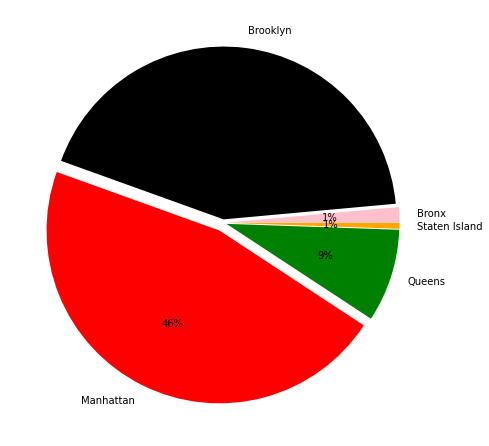

In [18]:
# Represent name of neighbourhood and count in a pie chart

neighbourhood_visualisation = neighbourhood_group_name.rename_axis('name_of_neighbourhood').reset_index(name = 'neighbourhood_count')

lable_name = neighbourhood_visualisation.name_of_neighbourhood
lable_value = neighbourhood_visualisation.neighbourhood_count
# # Defining colors for pie chart
colors = ['pink', 'black', 'red','green', 'orange']
  
# # Define ratio of gap of each fragment in a tuple
explode = (0.02, 0.02, 0.05, 0.02, 0.02)
fig = plt.figure()
ax = fig.add_axes([0.1,0.3,1,2])

ax.pie(lable_value, labels = lable_name, autopct = '%1.0f%%', colors = colors, explode=explode)
plt.show()


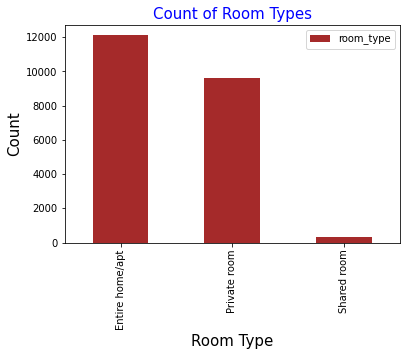

In [19]:
#  Bar graph of type of room and their number of rooms

# Create a bar graph
count_room_type.plot(kind='bar', y='room_type', legend=True, color = 'brown')
plt.xlabel('Room Type', size = 15)
plt.ylabel('Count', size = 15)

# Add a title
plt.title('Count of Room Types', color = 'blue', size = 15)

# Display the graph
plt.show()


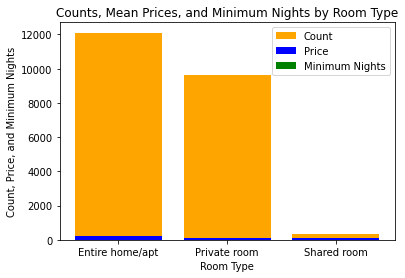

In [33]:
# Create a bar graph with multiple bars per category
fig, ax = plt.subplots()
ax.bar(count_room_type.index, count_room_type['room_type'], color='orange', label='Count')
ax.bar(count_room_type.index, count_room_type['price'], color='blue', label='Price')
ax.bar(count_room_type.index, count_room_type['minimum_nights'], color='green', label='Minimum Nights')

# Add labels and title
ax.set_xlabel('Room Type')
ax.set_ylabel('Count, Price, and Minimum Nights')
ax.set_title('Counts, Mean Prices, and Minimum Nights by Room Type')

# Add a legend for the colors

ax.legend()

# Display the graph
plt.show()


In [21]:
# Print top 8 host name and reviews per month

top_8_hosts = df.groupby(['host_name','neighbourhood_group'])['reviews_per_month'].mean().sort_values(ascending = False).head(8)
top_8_hosts = top_8_hosts.reset_index()
top_8_hosts

,host_name,neighbourhood_group,reviews_per_month
0,Danielle,Queens,14.676667
1,Dona,Queens,13.990000
2,Malini,Queens,13.150000
3,Miss Dy,Queens,12.840000
4,Reshma,Manhattan,10.000000
5,Claudette,Queens,9.830000
6,J. E,Brooklyn,9.670000
7,Vikas,Brooklyn,9.610000


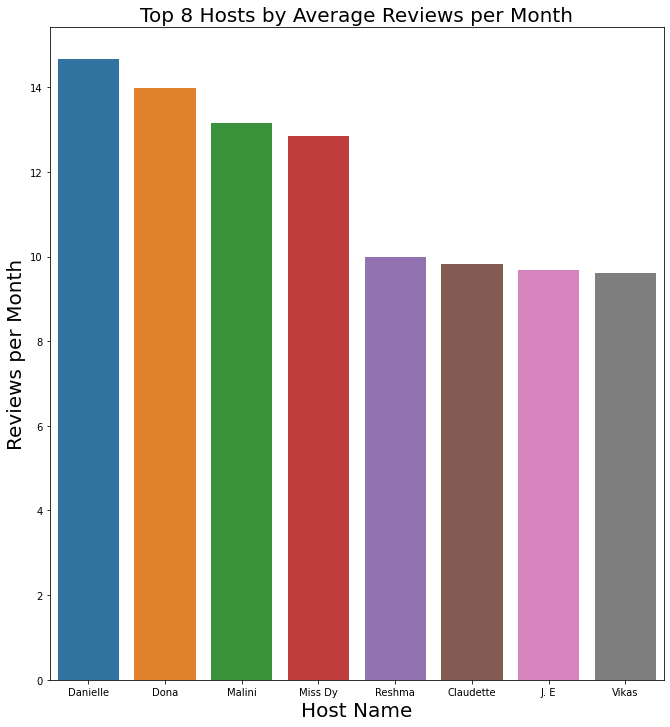

In [22]:

# Create a horizontal bar graph for top 8 host name and reviews per month

# Add labels and title

plt.figure(figsize = (11,12))

sns.barplot(x ='host_name',y = 'reviews_per_month', data = top_8_hosts)
plt.ylabel('Reviews per Month', size = 20)
plt.xlabel('Host Name', size = 20)
plt.title('Top 8 Hosts by Average Reviews per Month', size = 20)

# Display the graph
plt.show()


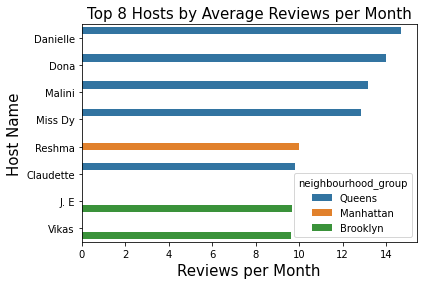

In [23]:

# Create a horizontal bar graph using seaborn for top 8 hosts name and review per month
sns.barplot(x="reviews_per_month", y="host_name", hue="neighbourhood_group", data=top_8_hosts.reset_index())

# Add labels and title
plt.xlabel('Reviews per Month', size =15)
plt.ylabel('Host Name', size =15)
plt.title('Top 8 Hosts by Average Reviews per Month', size =15)

# Display the graph
plt.show()


In [24]:
# Visualise the data in stacked bar -- Print the groups of name and the sum of their reviews in decending order. 


# Create a line plot of the top 15 names with the highest sum of reviews per month

# Assigning the value to name_group_and_review variable

name_group_and_reviews = df.groupby(['name']).agg({'reviews_per_month':'sum'}).sort_values(by = 'reviews_per_month',ascending = False).head(15)

name_group_and_reviews

,reviews_per_month
name,
Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22
Room near JFK Queen Bed,14.58
Sun Room Family Home LGA Airport NO CLEANING FEE,14.36
Private bedroom 8 mins-JFK&The Mall,13.48
Comfy Room Family Home LGA Airport NO CLEANING FEE,13.45
Room Near JFK Twin Beds,13.40
Cozy Room Close to JFK!!,13.15
THE PRIVACY DEN ~ 5 MINUTES TO JFK,12.84
"5 minutes from JFK,one single cozy bedroom for one",11.91


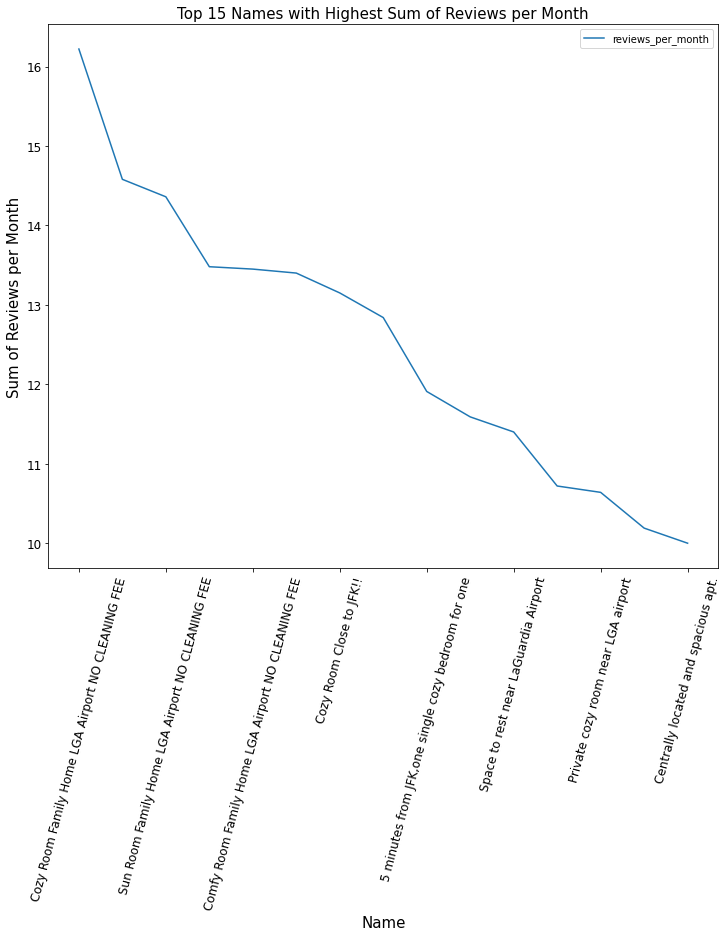

In [25]:
# Visualise the data in stacked bar -- Print the groups of name and the sum of their reviews in decending order.

# Visualization of name_group_and_reviews

name_group_and_reviews.plot(kind='line', figsize=(12, 10), fontsize = 12)

plt.xticks(rotation = 75)

# Add labels and title
plt.title('Top 15 Names with Highest Sum of Reviews per Month', fontsize = 15)
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Sum of Reviews per Month', fontsize = 15)
plt.show()


In [26]:
# Ki kis neighbourhood group me kitne rooms type honge

# Group the data by the "group" column and count the number of unique room types in each group

group_counts = df.groupby(['neighbourhood_group', 'room_type'])['room_type'].count()

# Print the result

group_counts

neighbourhood_group  room_type      
Bronx                Entire home/apt     119
                     Private room        192
                     Shared room           8
Brooklyn             Entire home/apt    4850
                     Private room       4523
                     Shared room         124
Manhattan            Entire home/apt    6303
                     Private room       3728
                     Shared room         172
Queens               Entire home/apt     771
                     Private room       1105
                     Shared room          42
Staten Island        Entire home/apt      59
                     Private room         62
Name: room_type, dtype: int64

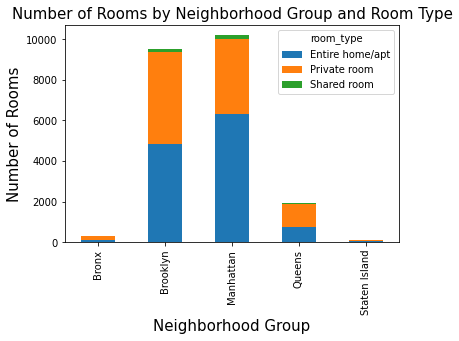

In [38]:
# Reshape the data to create a stacked bar graph
stacked_data = group_counts.unstack()

# Plot the stacked bar graph
stacked_data.plot(kind='bar', stacked=True)

# Add labels and titles
plt.xlabel('Neighborhood Group', size =15)
plt.ylabel('Number of Rooms', size =15)
plt.title('Number of Rooms by Neighborhood Group and Room Type', size =15)

# Print graph
plt.show()

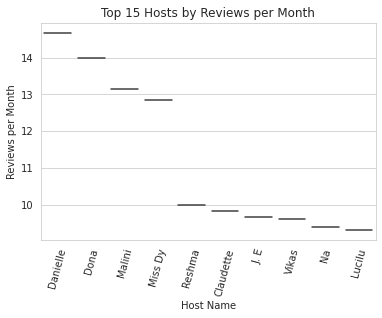

In [61]:
# Print top 10 host name and reviews per month and visualise on a graph 

top_10_hosts = df.groupby(['host_name','neighbourhood_group'])['reviews_per_month'].mean().sort_values(ascending = False).head(10)
top_10_hosts = top_10_hosts.reset_index()


sns.violinplot(x='host_name', y='reviews_per_month', data=top_10_hosts)

plt.xticks(rotation=75)
plt.title('Top 15 Hosts by Reviews per Month')
plt.xlabel('Host Name')
plt.ylabel('Reviews per Month')
plt.show()